In [1]:
import shutil
import os

shutil.copy2('./measdata/Verbatim_Simple_Flip_measurements.csv', 
             './measdata/State1.csv')
shutil.copy2('./measdata/Verbatim_Simple_Identity_measurements.csv', 
             './measdata/State0.csv')

'./measdata/State0.csv'

In [2]:
import numpy as np

qubits = np.loadtxt('./measdata/Verbatim_Simple_Identity_measured_qubits.csv', delimiter=',')
qubits_0 = np.array(qubits, dtype=int)

qubits = np.loadtxt('./measdata/Verbatim_Simple_Flip_measured_qubits.csv', delimiter=',')
qubits_1 = np.array(qubits, dtype=int)

Loaded 8192 shots for State 0.
Loaded 8192 shots for State 1.

--- Starting Calibration ---
Calibrating |0> state...
-----------------------------------
Notice: Consider Adjusting grouping to ensure good sample size. num_points > 16 is recommended, whereas 8 is given
-----------------------------------
   Using 8192 shots split into 8 points for KDE.
Inferring Qubit 1 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.025
Given Lambda |0>: prior error rate = 0.0250


<Figure size 640x480 with 0 Axes>

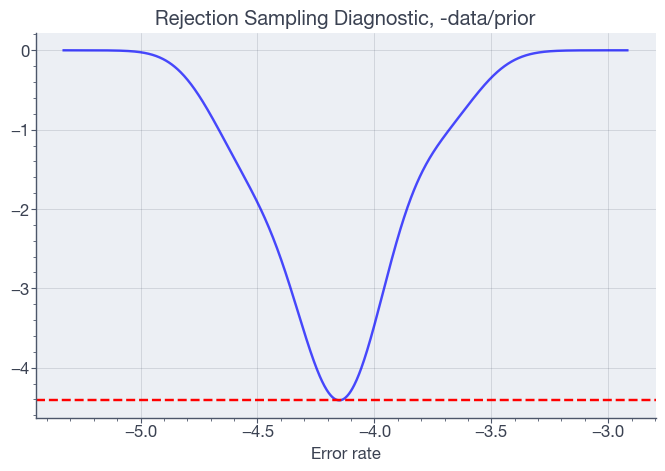

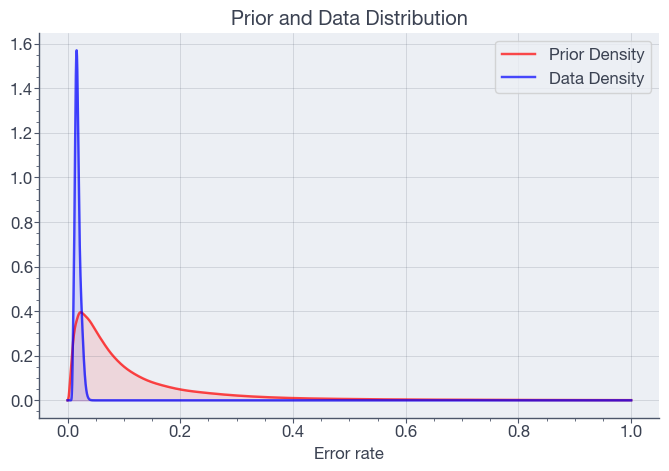

   Accepted N: 9099 (22.7%)
Inferring Qubit 2 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.011
Given Lambda |0>: prior error rate = 0.0110


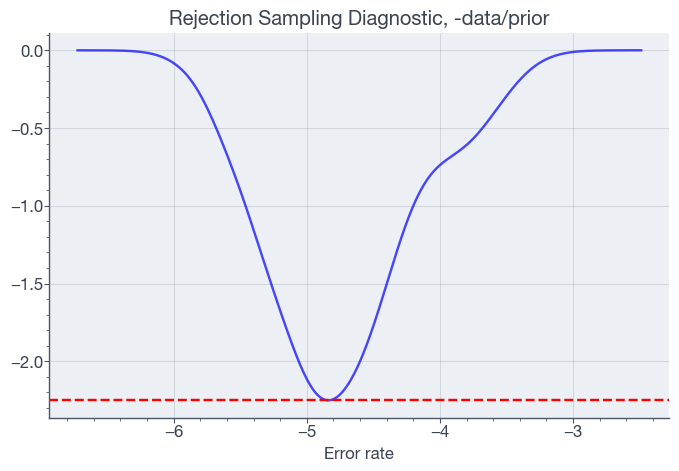

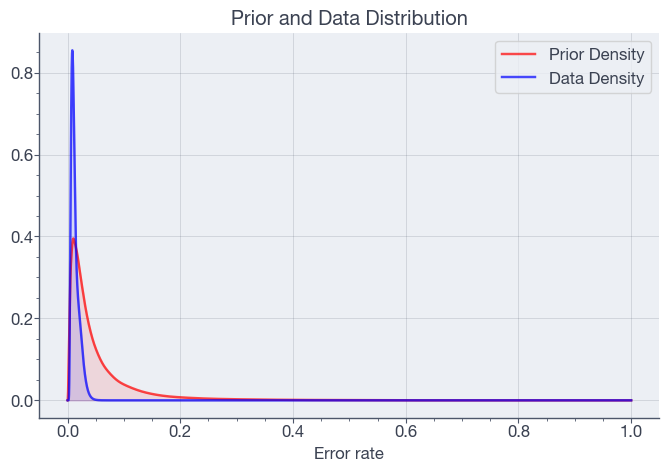

   Accepted N: 17884 (44.7%)
Inferring Qubit 3 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.007
Given Lambda |0>: prior error rate = 0.0070


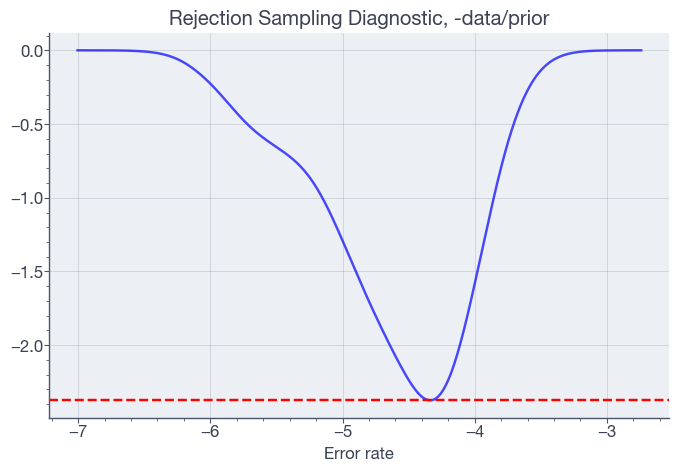

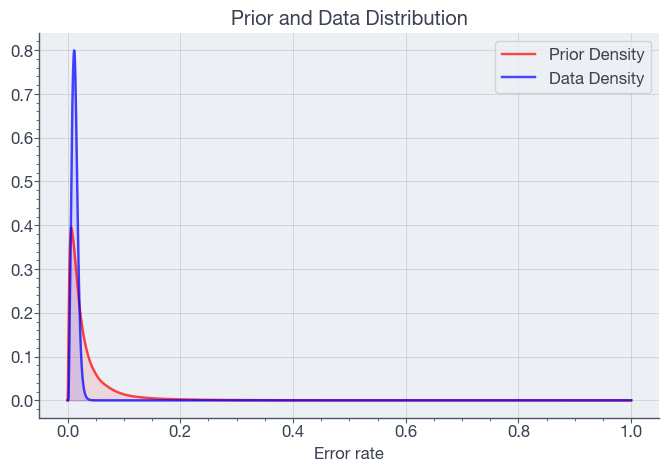

   Accepted N: 16976 (42.4%)
Inferring Qubit 4 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.01
Given Lambda |0>: prior error rate = 0.0100


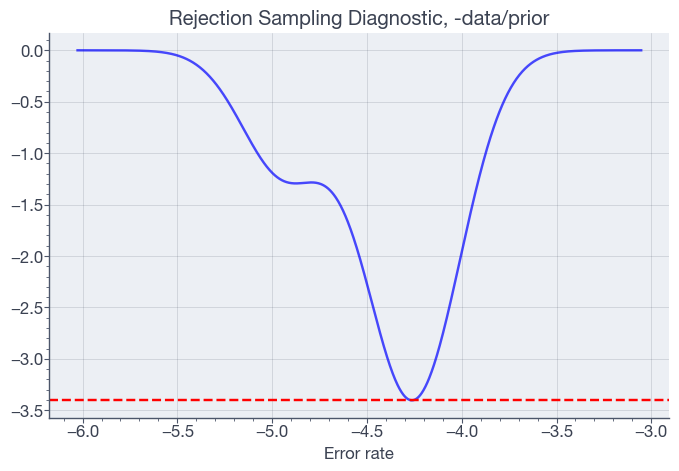

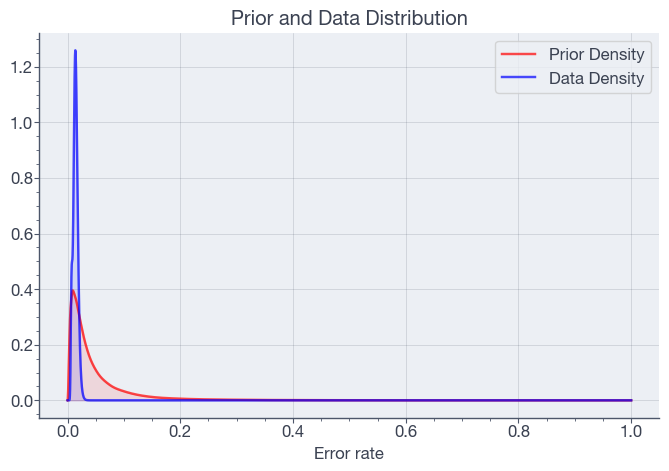

   Accepted N: 11859 (29.6%)
Inferring Qubit 5 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.0145
Given Lambda |0>: prior error rate = 0.0145


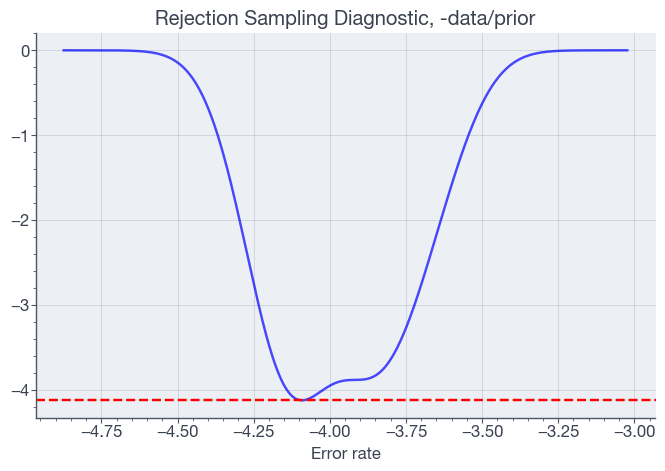

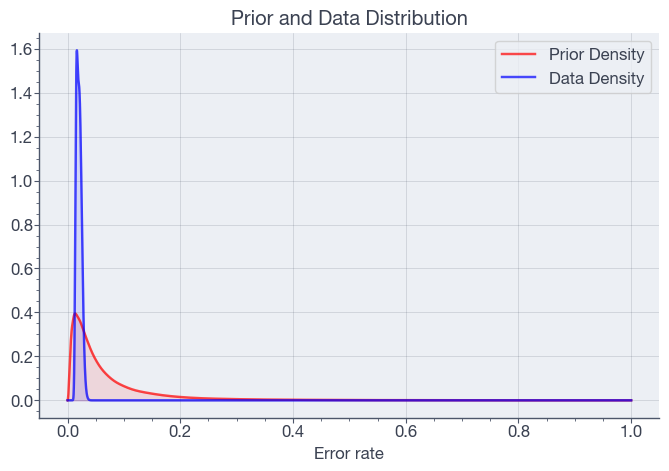

   Accepted N: 9765 (24.4%)
Inferring Qubit 6 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.0075
Given Lambda |0>: prior error rate = 0.0075


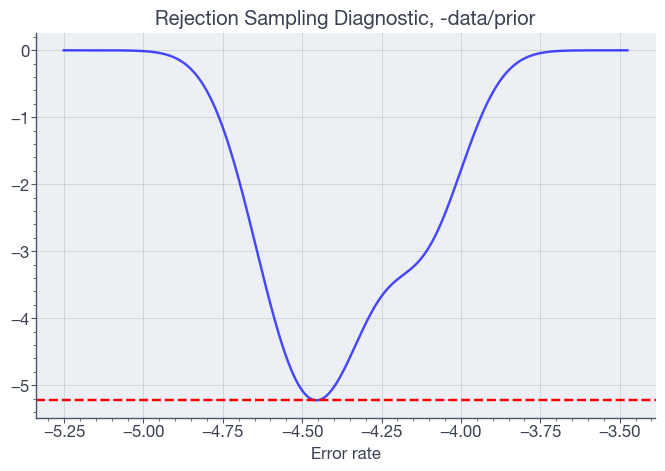

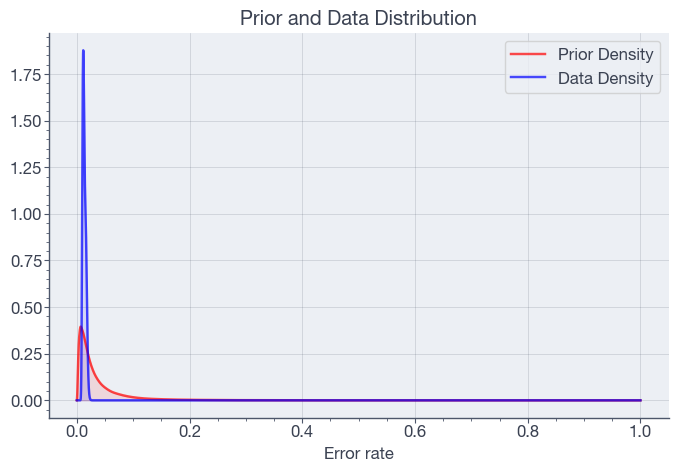

   Accepted N: 7808 (19.5%)
Inferring Qubit 7 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.033
Given Lambda |0>: prior error rate = 0.0330


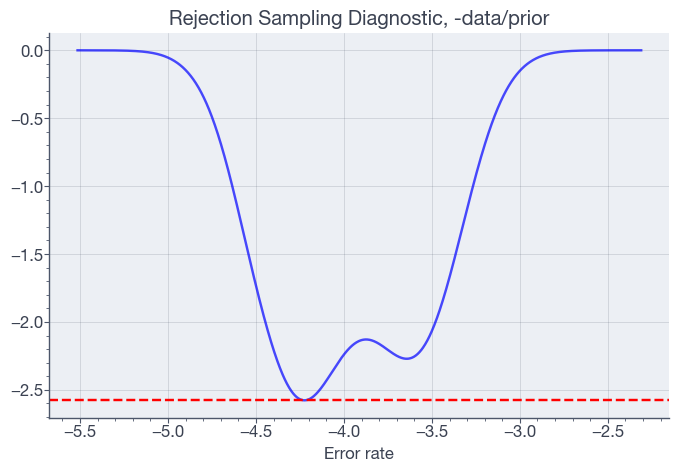

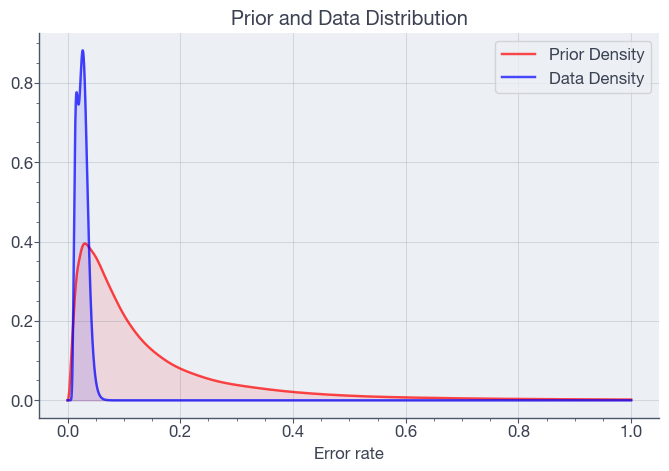

   Accepted N: 15621 (39.1%)
Inferring Qubit 8 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.0115
Given Lambda |0>: prior error rate = 0.0115


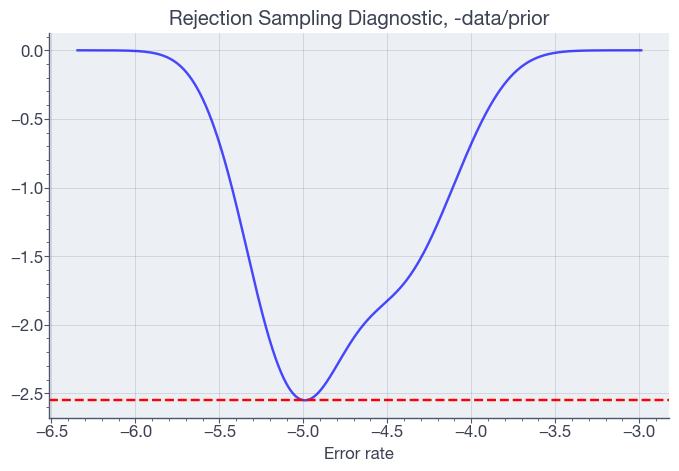

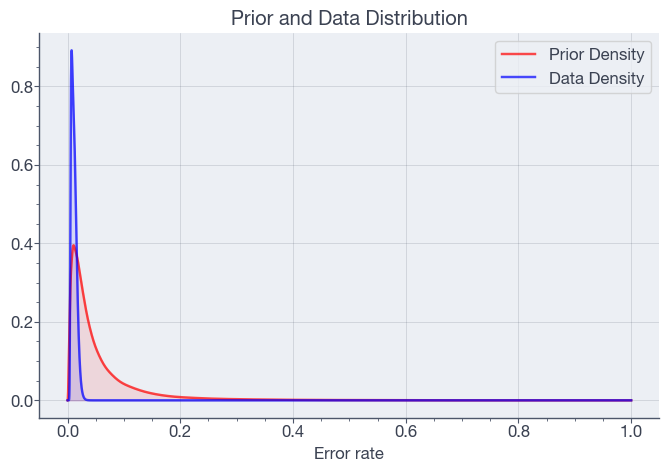

In [ ]:
from src.splitmeasfilter import SplitMeasFilter  # Assuming class is saved here

# Initialize
# Qubit order must match your bitstrings (e.g., '01' -> q1=0, q0=1 or vice versa depending on endianness)
# Standard Qiskit/Braket is usually Little Endian (Rightmost is q0)
# qubits = [1,2,3] 
my_filter = SplitMeasFilter(qubit_order=qubits, file_address='./measdata/')

print("\n--- Starting Calibration ---")
# Pass 1: Calibrate Error on State |0>
print("Calibrating |0> state...")
my_filter.qubit_order = qubits_0.tolist()
# Use a reasonable number of points (e.g., 50) for grouping
my_filter.inference(num_points=8, prep_state='0', nPrior=40000, prior_magnitude_width=1)

# Pass 2: Calibrate Error on State |1>
print("Calibrating |1> state...")
my_filter.qubit_order = qubits_1.tolist()
# Use a reasonable number of points (e.g., 50) for grouping
my_filter.inference(num_points=8, prep_state='1', nPrior=40000, prior_magnitude_width=1)

In [ ]:
from src.splitmeasfilter import SplitMeasFilter  # Assuming class is saved here

# Initialize
# Qubit order must match your bitstrings (e.g., '01' -> q1=0, q0=1 or vice versa depending on endianness)
# Standard Qiskit/Braket is usually Little Endian (Rightmost is q0)
# qubits = [1,2,3] 
my_filter = SplitMeasFilter(qubit_order=qubits, file_address='./measdata/')

print("\n--- Starting Calibration ---")

## providing the true errors which I used to simulate the data in samples/CZ_test.ipynb
# my_filter.params = {
#     'Qubit1': {'err0': 0.067, 'err1': 0.072},
#     'Qubit2': {'err0': 0.095, 'err1': 0.085},
#     'Qubit3': {'err0': 0.035, 'err1': 0.005}
# }

# Pass 1: Calibrate Error on State |0>
print("Calibrating |0> state...")
my_filter.qubit_order = qubits_0
my_filter.inference(num_points = 8, prep_state='0', nPrior=40000, prior_sd= 0.1)

# Pass 2: Calibrate Error on State |1>
print("Calibrating |1> state...")
my_filter.qubit_order = qubits_1
my_filter.inference(num_points = 16,prep_state='1', nPrior=40000, prior_sd= 0.1)

print("Inference Complete.")

In [ ]:
a = np.array([])
if (a.any()):
    print("woooo!!")
else:
    print("still...... WOOOOO1OOOO!")

In [ ]:
from src.splitmeasfilter import SplitMeasFilter  # Assuming class is saved here

# Initialize
# Qubit order must match your bitstrings (e.g., '01' -> q1=0, q0=1 or vice versa depending on endianness)
# Standard Qiskit/Braket is usually Little Endian (Rightmost is q0)
# qubits = [1,2,3] 
# my_filter = SplitMeasFilter(qubit_order=qubits, file_address='./measdata/',)

my_filter.error_distributions()